In [3]:
using PyPlot,JLD2,CALCEPH,Statistics
rc("font",family="serif")
include("CGS.jl")

Main.CGS

## Simulating Transit Times

In [2]:
include("sim_times.jl")
jd1 = 2.4332825e6
jd2 = 2.4478925e6
jdsize = 1000
sigma = 30.0
tt1,tt2,n_obs,pva_sun,pva_venus,pva_earth = sim_times(jd1,jd2,jdsize,true,sigma,true)

([2.4335037644169717e6, 2.4337284657591507e6, 2.4339531686526095e6, 2.4341778674053787e6, 2.4344025666358513e6, 2.434627271414518e6, 2.4348519724271446e6, 2.4350766718297163e6, 2.4353013698371616e6, 2.4355260698588854e6  …  2.4460870068001836e6, 2.4463117113811756e6, 2.446536412759622e6, 2.4467611126025775e6, 2.4469858106462015e6, 2.447210510572503e6, 2.44743521584485e6, 2.4476599158510813e6, 2.4478846141334274e6, 2.4481093143305457e6], [2.433624405366266e6, 2.433989659466875e6, 2.4343549165502605e6, 2.434720170357342e6, 2.4350854292193004e6, 2.4354506863932475e6, 2.435815938462895e6, 2.436181195268732e6, 2.436546452107642e6, 2.4369117086419472e6  …  2.444947349860095e6, 2.4453126079719667e6, 2.4456778645911547e6, 2.4460431244664053e6, 2.446408379255063e6, 2.446773637153357e6, 2.447138893738364e6, 2.4475041465111035e6, 2.447869404865882e6, 2.448234661849768e6], [0.22607071184005492, 0.8936832878479234, 0.3875851058405838], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0

In [34]:
eph = Ephem("INPUTS/planets.dat") ; prefetch(eph)
options = useNaifId + unitDay + unitAU

37

In [4]:
# pva0,pva1,and pva2 are the body positions,velocities,and ang. momentum computed at the transit times found
pva0 = zeros(9,length(tt2))
pva1 = zeros(9,length(tt2))
pva2 = zeros(9,length(tt2))
for i=1:length(tt2)
pva0[1:9,i] = compute(eph,tt1[i],0.5,10,10,options,2)
pva1[1:9,i] = compute(eph,tt1[i],0.5,2,10,options,2)
# if include_moon
#   pva_2[1:9,i] = compute(eph,t0[i],0.5,3,10,options,2) 
# else
pva2[1:9,i] = compute(eph,tt2[i],0.5,399,10,options,2)
end

In [37]:
# download("ftp://ssd.jpl.nasa.gov/pub/eph/planets/Linux/de405/lnxp1600p2200.405","DE405")
# eph1 = Ephem("DE405")
# options = useNaifId + unitRad + unitSec + outputNutationAngles
target = naifId.id[:earth]
jd1 = 2.443388e6
# jd1 = 2.4337284657591507e6
jd2 = 0.5
compute(eph,jd1,jd2,399,10,options,2)

9-element Array{Float64,1}:
  0.9464261665704893   
 -0.32067375933254316  
 -0.13904198980693358  
  0.0056832718940735   
  0.014742492408562523 
  0.006393218629880074 
 -0.0002713591940682681
  9.312632389504948e-5 
  4.0341840200461165e-5

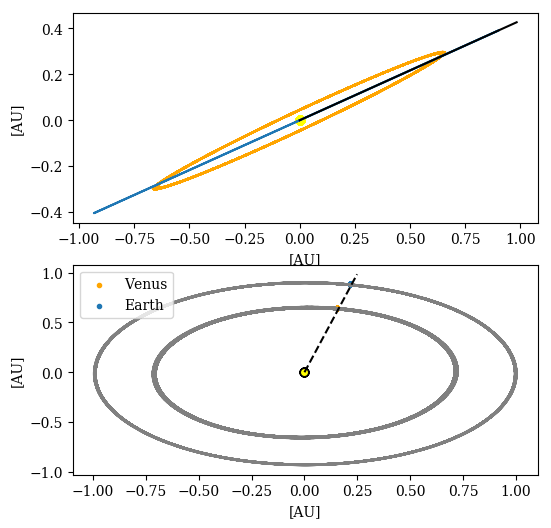

In [77]:

        
fig=figure(figsize=(6,6))
subplot(211)
ax1=gca()
ax1.plot(vec(pva_sun[2,:]),vec(pva_sun[3,:]),label="Sun",color=:yellow,marker="o")
# ax1.plot(vec(pva_sun[2,:]),vec(pva_sun[3,:]),color=:yellow,marker="o",mec="black")
ax1.plot(vec(pva_venus[2,:]),vec(pva_venus[3,:]),label="Venus",color=:orange)
ax1.plot(vec(pva_earth[2,:]),vec(pva_earth[3,:]),label="Earth")
# ax1.plot([0,n_obs[2]*1.1],[0,n_obs[3]*1.1],color=:black)
# ax1.tick_params(which="major",direction="in",length=6,
#     left="false",right="false",top="false",bottom="false",
#     labelbottom="false",labeltop="false",labelleft="false",labelright="false")
xlabel("[AU]")
ylabel("[AU]")
# legend(loc="lower left")

subplot(212)
ax2=gca()
ax2.scatter(vec(pva0[2,:]),vec(pva0[3,:]),color=:yellow,marker="o",edgecolors="black")
# ax2.scatter(pva_venus[1,imin1],pva_venus[2,imin1],label="Venus Transit",color=:orange)
ax2.plot(vec(pva_venus[1,:]),vec(pva_venus[2,:]),color=:gray)
ax2.scatter(vec(pva1[1,:]),vec(pva1[2,:]),label="Venus",color=:orange,marker=".")
# ax2.scatter(pva_earth[1,imin2],pva_earth[2,imin2],label="Earth Transit")
ax2.plot(vec(pva_earth[1,:]),vec(pva_earth[2,:]),color=:gray)
ax2.scatter(vec(pva2[1,:]),vec(pva2[2,:]),label="Earth",marker=".")
ax2.plot([0,n_obs[1]*1.1],[0,n_obs[2]*1.1],"k--")
# ax2.tick_params(which="major",direction="in",
#     left="true",right="false",top="false",bottom="true",
#     labelbottom="true",labeltop="false",labelleft="true",labelright="false")
ax2.legend()
xlabel("[AU]")
ylabel("[AU]")
show()

### Plot of simulated years observed vs TTVs

In [303]:
include("decompose_ttvs.jl")
include("plot_likelihood.jl")
include("corner_plot.jl")
include("plot_ttvs.jl")

plot_ttvs (generic function with 2 methods)

In [40]:
fit = jldopen("OUTPUTS/p3_fittry003params.jld2","r")

JLDFile /Users/bethleelindor/work/washington/ttv_project/ttv_ss/OUTPUTS/p3_fittry003params.jld2 (read-only)
 ├─🔢 param_p3
 ├─🔢 lprob_p3
 ├─🔢 lprob_best
 ├─🔢 pbest_global
 ├─🔢 ntrans
 ├─🔢 nplanet
 ├─🔢 jd1
 ├─🔢 jd2
 ├─🔢 jdsize
 ├─🔢 tt0
 ├─🔢 tt
 ├─🔢 ttmodel
 ├─🔢 sigtt
 ├─🔢 p3in
 ├─🔢 p3out
 ├─🔢 np3
 └─🔢 nphase

In [113]:
@load ("OUTPUTS/p3_fittry003params.jld2")

17-element Array{Symbol,1}:
 :param_p3    
 :lprob_p3    
 :lprob_best  
 :pbest_global
 :ntrans      
 :nplanet     
 :jd1         
 :jd2         
 :jdsize      
 :tt0         
 :tt          
 :ttmodel     
 :sigtt       
 :p3in        
 :p3out       
 :np3         
 :nphase      

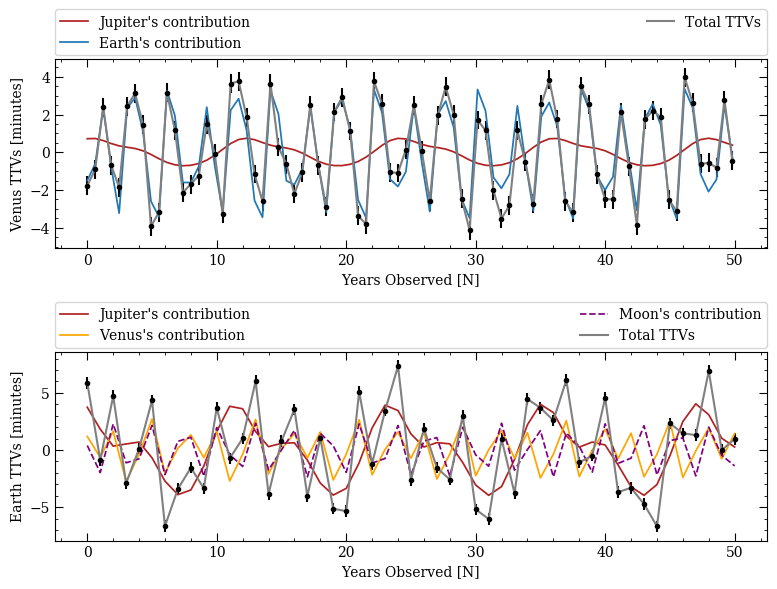

In [170]:
plot_ttvs(true)
# savefig("ttvs.png")

In [ ]:
# plot_ttvs(true)
# savefig("embttvs.png")

In [569]:
plot_likelihood(true)

UndefVarError: UndefVarError: lprob_p3 not defined

In [116]:
# @load ("OUTPUTS/moon_fitmtry3params.jld2") 
plot_likelihood(true)

BoundsError: BoundsError: attempt to access 15-element Array{Float64,1} at index [18]

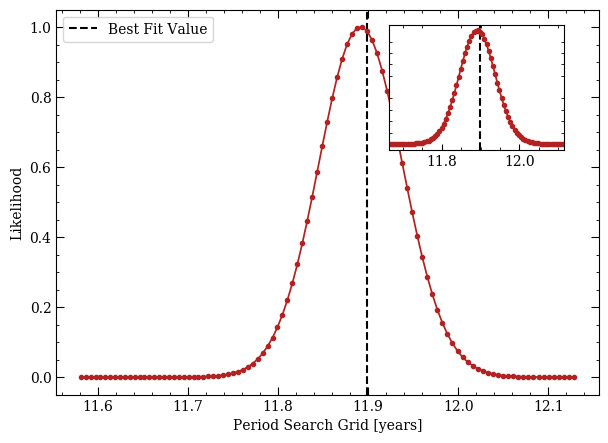

In [95]:
fig = plt.figure(figsize=(7, 5))
ax1 = gca()
p3 = 10 .^ range(log10(fit["p3in"]),stop=log10(fit["p3out"]),length=fit["np3"])
axvline(param[12]/365.25,linestyle="--",color="black",label="Best Fit Value")
ax1.plot(p3/365.25,exp.((fit["lprob_p3"] .-maximum(fit["lprob_p3"]))),linewidth=1.25,marker=".",color="firebrick")
ax1.minorticks_on()
ax1.tick_params(which="major",direction="in",top="true",right="true",length=6)
ax1.tick_params(which="minor",direction="in",top="true",right="true",length=2)
xlabel("Period Search Grid [years]")
ylabel("Likelihood")
legend(loc="upper left")
ax2 = fig.add_axes([0.6,0.6,0.25,0.25])
axvline(param[12]/365.25,linestyle="--",color="black")
ax2.plot(p3/365.25,exp.((fit["lprob_p3"] .-maximum(fit["lprob_p3"]))),linewidth=1.25,marker=".",color="firebrick")
ax2.set_xlim(4260/365.25,4425/365.25)
ax2.minorticks_on()
ax2.tick_params(which="minor",direction="in",top="true",right="true",length=2)
ax2.tick_params(which="major",direction="in",length=4,
    left="false",right="false",top="false",bottom="true",
    labelbottom="true",labeltop="false",labelleft="false",labelright="false")
# plot!( -5:8,(-5:8).^2,inset = (1,bbox(0.1,0.0,0.4,0.4)),subplot = 2)
# savefig("IMAGES/p3likelihood.png")

In [2]:
years = [4,6,8,10,12,14,16,18,20,24,28,32,36,40]
function calc_jd2(nyrs)
return    (nyrs * 365.25) + jd1
end

calc_jd2 (generic function with 1 method)

In [6]:
for i=1:length(years)
    println("NYears: ",years[i]," ; jd2 = ",calc_jd2(years[i]))
end

NYears: 4 ; jd2 = 2.4347435e6
NYears: 6 ; jd2 = 2.435474e6
NYears: 8 ; jd2 = 2.4362045e6
NYears: 10 ; jd2 = 2.436935e6
NYears: 12 ; jd2 = 2.4376655e6
NYears: 14 ; jd2 = 2.438396e6
NYears: 16 ; jd2 = 2.4391265e6
NYears: 18 ; jd2 = 2.439857e6
NYears: 20 ; jd2 = 2.4405875e6
NYears: 24 ; jd2 = 2.4420485e6
NYears: 28 ; jd2 = 2.4435095e6
NYears: 32 ; jd2 = 2.4449705e6
NYears: 36 ; jd2 = 2.4464315e6
NYears: 40 ; jd2 = 2.4478925e6


In [82]:
pname = ["mu_1","P_1","t01","e1 cos(om1)","e1 sin(om1)",
            "mu_2","P_2","t02","e2 cos(om2)","e2 sin(om2)",
            "mu_3","P_3","t03","e3 cos(om3)","e3 sin(om3)",
            "tmax sin(phi0)","tmax cos(phi0)","deltaphi"]

18-element Array{String,1}:
 "mu_1"          
 "P_1"           
 "t01"           
 "e1 cos(om1)"   
 "e1 sin(om1)"   
 "mu_2"          
 "P_2"           
 "t02"           
 "e2 cos(om2)"   
 "e2 sin(om2)"   
 "mu_3"          
 "P_3"           
 "t03"           
 "e3 cos(om3)"   
 "e3 sin(om3)"   
 "tmax sin(phi0)"
 "tmax cos(phi0)"
 "deltaphi"      

In [249]:
function vectorize_data(include_moon::Bool=false)
    names = ["mu", "P", "t0", "e cos(om)", "e sin(om)"]
    planet = ["venus", "earth", "jupiter"]
    nparam = length(names)*length(planet)+1
#     state_total = zeros((nsteps-iburn)*nwalkers+50,nparam-1)
    for iparam=1:nparam-1
#     state_total[:,iparam] += vec(par_mcmc[:,iburn:nsteps,iparam])
    if iparam < nparam
        pname = string(planet[div(iparam-1,5)+1]," ",names[mod(iparam-1,5)+1])
    end
        println("index: ",iparam, " ",pname," : ",pbest_global[iparam])
    end
#     for iparam=1:3
#     if iparam < nparam
end

vectorize_data (generic function with 2 methods)

## MCMC Diagnostics

In [11]:
nparam = 18  
samplesize = zeros(nparam)
for j=1:nwalkers
for i=1:nparam
  samplesize[i] += effective_sample_size(par_mcmc[j,:,i])
end
end
indepsamples = minimum(samplesize)
#   println("Independent Sample Size: ",indepsamples)


1600.6485560900187

In [26]:
function extract_data(filename)
	f = jldopen(String(filename), "r")
	return f
end
#unsure if this works within for loops
#might have used in 200000 step moon run on desktop

extract_data (generic function with 1 method)

In [5]:
f = extract_data("OUTPUTS/moon_fitmtry3params.jld2")

JLDFile /Users/bethleelindor/work/washington/ttv_project/ttv_ss/OUTPUTS/moon_fitmtry3params.jld2 (read-only)
 ├─🔢 pbest_dp
 ├─🔢 lprob_dp
 ├─🔢 lprob_best
 ├─🔢 pbest_global
 ├─🔢 ntrans
 ├─🔢 nplanet
 ├─🔢 tt0
 ├─🔢 tt
 ├─🔢 ttmodel
 ├─🔢 sigtt
 ├─🔢 p3in
 ├─🔢 p3out
 ├─🔢 np3
 ├─🔢 nphase
 ├─🔢 dpin
 ├─🔢 dpout
 └─🔢 ndp

In [5]:
@load("mcmc_mtry3results.jld2")
@load("OUTPUTS/moon_fitmtry3params.jld2")

17-element Array{Symbol,1}:
 :pbest_dp    
 :lprob_dp    
 :lprob_best  
 :pbest_global
 :ntrans      
 :nplanet     
 :tt0         
 :tt          
 :ttmodel     
 :sigtt       
 :p3in        
 :p3out       
 :np3         
 :nphase      
 :dpin        
 :dpout       
 :ndp         

In [512]:
include("corner_plot.jl")

corner_plot (generic function with 1 method)

## Posterior Distributions

### Plot masses of Venus and Earth in $M_{\oplus}$

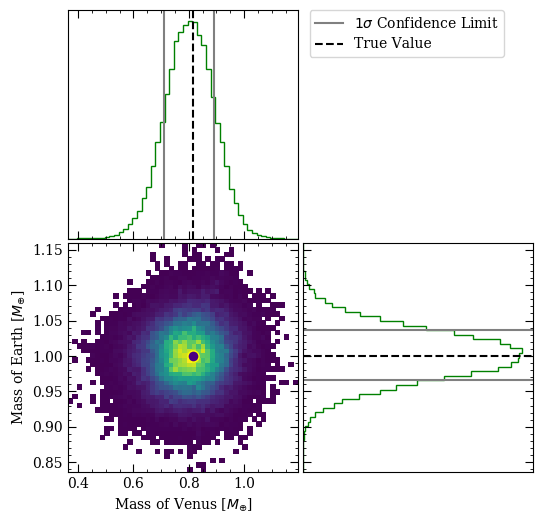

PyObject Text(26.700000000000003, 0.5, 'Mass of Earth [$M_{\\oplus}$]')

In [300]:
xvalue = vec(par_mcmc[:,iburn:nsteps,1]).* CGS.MSUN/CGS.MEARTH
yvalue = vec(par_mcmc[:,iburn:nsteps,6]).*CGS.MSUN/CGS.MEARTH
optx = mu_1.* CGS.MSUN/CGS.MEARTH
opty = mu_2.* CGS.MSUN/CGS.MEARTH
truex = 0.815
truey = 1
nbins = 50
corner_plot(xvalue,yvalue,nbins,optx,opty,truex,truey)
xlabel(L"Mass of Venus [$M_{\oplus}$]")
ylabel(L"Mass of Earth [$M_{\oplus}$]")
# savefig("massposteriors.png")

### Plot eccentricities of Venus and Earth

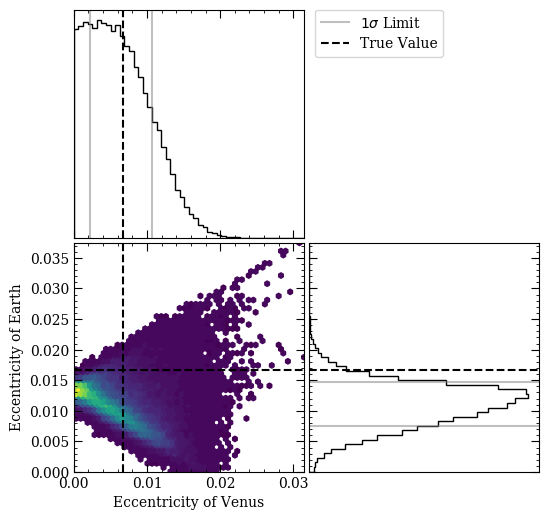

PyObject Text(24.0, 0.5, 'Eccentricity of Earth')

In [513]:
xvalue = sqrt.(vec(par_mcmc[:,iburn:nsteps,4]).^2 + vec(par_mcmc[:,iburn:nsteps,5]).^2)
yvalue = sqrt.(vec(par_mcmc[:,iburn:nsteps,9]).^2 + vec(par_mcmc[:,iburn:nsteps,10]).^2)
optx = sqrt(e1cosw1^2 + e1sinw1^2)
opty = sqrt(e2cosw2^2 + e2sinw2^2)
truex = 0.00677323
truey = 0.01671022
nbins=50
corner_plot(xvalue,yvalue,nbins,optx,opty,truex,truey)
xlabel("Eccentricity of Venus")
ylabel("Eccentricity of Earth")
# savefig("eccposteriors.png")

### Plot periods of Venus and Earth?

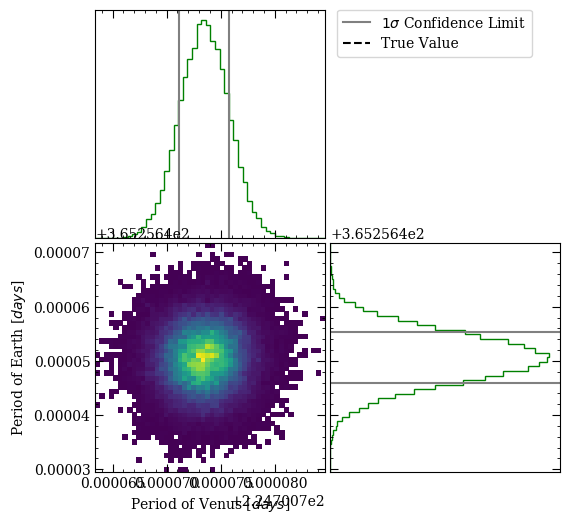

PyObject Text(28.000000000000014, 0.5, 'Period of Earth [$days$]')

In [288]:
xvalue = vec(par_mcmc[:,iburn:nsteps,2])
yvalue = vec(par_mcmc[:,iburn:nsteps,7]) 
optx = P_1
opty = P_2
truex = 225
truey = 365
nbins=50
corner_plot(xvalue, yvalue, nbins, optx, opty, truex, truey)
xlabel(L"Period of Venus [$days$]")
ylabel(L"Period of Earth [$days$]")


### Plot mass of Jupiter $M_{Jup}$ vs its eccentricity

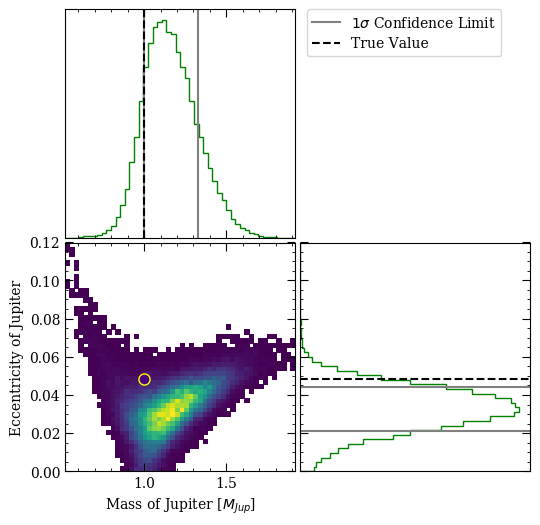

PyObject Text(24.0, 0.5, 'Eccentricity of Jupiter')

In [293]:
xvalue = vec(par_mcmc[:,iburn:nsteps,11]).* CGS.MSUN/CGS.MJUPITER
yvalue = sqrt.(vec(par_mcmc[:,iburn:nsteps,14]).^2 + vec(par_mcmc[:,iburn:nsteps,15]).^2)
optx = mu_3.* CGS.MSUN/CGS.MJUPITER
opty = sqrt(e3cosw3^2 + e3sinw3^2)
truex = 1
truey = 0.04839266
nbins=50
corner_plot(xvalue, yvalue, nbins, optx, opty, truex, truey)
xlabel(L"Mass of Jupiter [$M_{Jup}$]")
ylabel("Eccentricity of Jupiter")
# savefig("jupiterposteriors.png")

### Plot time of inferior conjuction [JD - 24550000] $t_{03}$ vs Jupiter period $P_3$. 

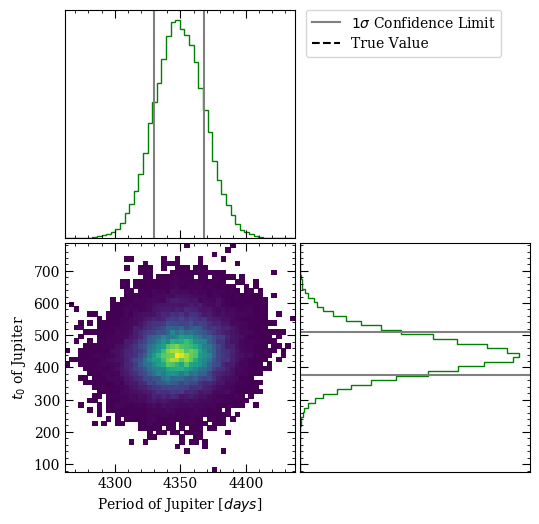

PyObject Text(0.5, 28.0, 'Period of Jupiter [$days$]')

In [279]:
xvalue = vec(par_mcmc[:,iburn:nsteps,12])
yvalue = vec(par_mcmc[:,iburn:nsteps,13]) .- 2.443e6
optx = P_3
opty = t03 .- 2.443e6
# truex = 1
# truey = 0.04839266
nbins=50
corner_plot(xvalue, yvalue, nbins, optx, opty, truex, truey)
xlabel(L"Period of Jupiter [$days$]")
ylabel(L"$t_{0}$ of Jupiter")

### Plot TTV of Earth due to Moon $t_{max}$ vs phase change of Moon per Earth year $\Delta \phi$

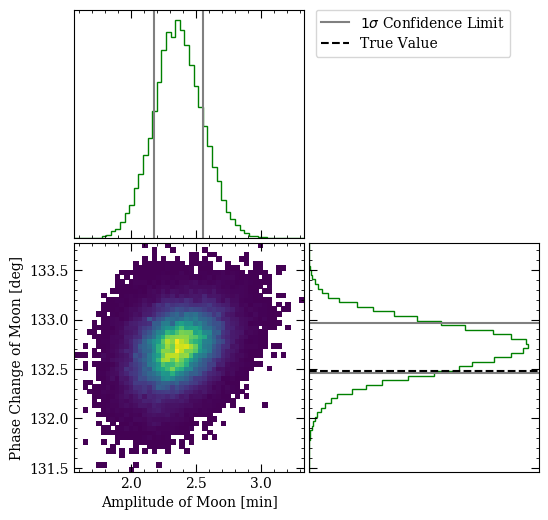

PyObject Text(24.000000000000014, 0.5, 'Phase Change of Moon [deg]')

In [432]:
# function plot_posterior(samples,bins,range)
# tmax = vec(sqrt(par_mcmc[:,iburn:nsteps,16]).^2 + vec(par_mcmc[:,iburn:nsteps,17]).^2)
xvalue = sqrt.(vec(par_mcmc[:,iburn:nsteps,16].^2) + vec(par_mcmc[:,iburn:nsteps,17].^2)).* (24 * 60)
yvalue = vec(par_mcmc[:,iburn:nsteps,18]).* 57.2957795 
optx = sqrt(param[16]^2 + param[17]^2).* (24 * 60)
opty = param[18].* 57.2957795 
# truex = 
truey = 2.3122 .* 57.2957795 
meanx=mean(xvalue);sigmax=std(xvalue)
meany=mean(yvalue);sigmay=std(yvalue)
nbins=50
corner_plot(xvalue,yvalue,nbins,optx,opty,truex,truey)
xlabel("Amplitude of Moon [min]")
ylabel("Phase Change of Moon [deg]")
# savefig("moonposteriors.png")

### Plot longitude of ascending node $\Omega$ vs longitude of pericenter $\bar \omega$; with argument of pericenter $\omega$

In [93]:
mu_1,P_1,t01,e1cosw1,e1sinw1,
mu_2,P_2,t02,e2cosw2,e2sinw2,
mu_3,P_3,t03,e3cosw3,e3sinw3,
tmaxsinphi0,tmaxcosphi0,deltaphi = f["pbest_global"]

18-element Array{Float64,1}:
    2.4400941294022936e-6 
  224.70077362581506      
    2.433503768774977e6   
   -0.007328894195584011  
    0.0020534775024117742 
    2.9954561266272332e-6 
  365.2564507566987       
    2.433624407591685e6   
    0.007444837391202356  
    0.00468779249816318   
    0.0012445740058471665 
 4346.048466293495        
    2.4433983646784374e6  
    0.0324036100900935    
   -0.02593064969074354   
    0.00027495030012111263
   -0.0016078136447759453 
    2.315532687104481     

In [13]:
calc_deg(value) = value * 180/pi
calc_omega(pomega,Omega) = pomega - Omega

calc_argperi (generic function with 1 method)

In [259]:
function calc_L(t,t0,P,esinw)
    lambda = (360/P .* (t.-t0)) .+ 2*esinw
    return lambda
end

calc_L (generic function with 1 method)

In [66]:
P_1/365.25,P_2/365.25,P_3/365.25

(0.6151971899406299, 1.0000176612093052, 11.898832214355908)

In [67]:
e1 = sqrt.(e1cosw1.^2 + e1sinw1.^2)
e2 = sqrt.(e2cosw2.^2 + e2sinw2.^2)
e3 = sqrt.(e3cosw3.^2 + e3sinw3.^2)
e1,e2,e3

(0.007611140517884051, 0.008797783941838973, 0.041501717316936027)

In [215]:
w1 = calc_deg(atan(e1sinw1,e1cosw1))
w2 = calc_deg(atan(e2sinw2,e2cosw2))
w3 = calc_deg(atan(e3sinw3,e3cosw3))
w1,w2,w3

(165.39311898503723, 15.569762909646679, -51.051808614512645)

Agol & Deck 2015 equation 5 for mean longitude

$L \equiv \lambda$. Check to see if $\lambda_{E} \sim \lambda_{V}$ at their respective transit times. $\lambda mod 2 \pi = \lambda_{obs}$[what?] where $\lambda_{obs}$ is longitude that both Earth and Venus have.

In [269]:
L_1 = calc_L(t01,J2000,P_1,e1sinw1)
L_2 = calc_L(t02,J2000,P_2,e2sinw2)
L_3 = calc_L(t03,J2000,P_3,e3sinw3)
L_1,L_2,L_3

(-28904.40831670686, -17662.688588053505, -676.5458231208416)

In [266]:
L_1+w1,L_2+w2,L_3+w3

(420.9842143140055, -7.118875546130161, -727.5976317353543)

Venus transit occurs 0.277 radians after it goes through periastron. Earth transit occurs -0.552 radians after it goes through periastron

In [272]:
J2000 = 2451545.0
((J2000 - t01)/365.25)

49.39419909597876

In [83]:
true_w1 = 131.60246718 - 0.00268329*.5
true_w2 = 102.94719 - 0.32327364*.5
true_w3 = 14.72847983 - 0.21252668*.5
true_w1,true_w2,true_w3

(131.601125535, 102.78555318000001, 14.62221649)

## 10 second noise

In [27]:
f = extract_data("OUTPUTS/moon_fitmtry2params.jld2")

JLDFile /Users/bethleelindor/work/washington/ttv_project/ttv_ss/OUTPUTS/moon_fitmtry2params.jld2 (read-only)
 ├─🔢 pbest_dp
 ├─🔢 lprob_dp
 ├─🔢 lprob_best
 ├─🔢 pbest_global
 ├─🔢 ntrans
 ├─🔢 nplanet
 ├─🔢 tt0
 ├─🔢 tt
 ├─🔢 ttmodel
 ├─🔢 sigtt
 ├─🔢 p3in
 ├─🔢 p3out
 ├─🔢 np3
 ├─🔢 nphase
 ├─🔢 dpin
 ├─🔢 dpout
 └─🔢 ndp

In [28]:
@load("mcmc_mtryresults.jld2")

┌ Warning: Opening file with JLD2.MmapIO failed, falling back to IOStream
└ @ JLD2 /Users/bethleelindor/.julia/packages/JLD2/eU405/src/JLD2.jl:196


LoadError: SystemError: opening file "mcmc_mtry2results.jld2": No such file or directory

In [111]:
mu_1,P_1,t01,e1cosw1,e1sinw1,
mu_2,P_2,t02,e2cosw2,e2sinw2,
mu_3,P_3,t03,e3cosw3,e3sinw3,
tmaxsinphi0,tmaxcosphi0,deltaphi = f["pbest_global"]

18-element Array{Float64,1}:
    2.489832072171513e-6  
  224.7007742380635       
    2.4335037687801938e6  
   -0.002659481652912364  
    0.0006930841579504842 
    3.024219358350708e-6  
  365.25645172058535      
    2.4336244075952456e6  
    0.011320183710457543  
    0.0031542132416973135 
    0.0010845232576194538 
 4338.957240100549        
    2.4433916179257063e6  
    0.02662502747162021   
   -0.0329400278014232    
    0.00016143855627089146
   -0.001650262652762611  
    2.313942655043264     

In [114]:
w1 = calc_deg(atan(e1sinw1,e1cosw1))
w2 = calc_deg(atan(e2sinw2,e2cosw2))
w3 = calc_deg(atan(e3sinw3,e3cosw3))
w1,w2,w3

(165.39311898503723, 15.569762909646679, -51.051808614512645)

In [216]:
L_1 = calc_L(tt1,tt01,P_1,e1sinw1)
L_2 = calc_L(tt2,tt02,P_2,e2sinw2)
L_1,L_2

([0.001351588241822039, 0.0013685620565686834, 0.0014324167979205308, 0.001372730271472388, 0.0013497376926360789, 0.0014333338432207616, 0.0014465750617170666, 0.0014142989682503762, 0.0013097737860703962, 0.0013241310503116905  …  0.0014214406662113978, 0.0013366685601096699, 0.0013246399513378295, 0.0014624390417513824, 0.0014363235114218877, 0.0013732672067822125, 0.0013743308819331548, 0.0013694578775853995, 0.0014389546064209101, 0.0013765017485267608], [0.006377984440033805, 0.006297345358051033, 0.006364142215230993, 0.006273032125086134, 0.006309163532761862, 0.006359568955757849, 0.00622819309417207, 0.0062670383882373025, 0.0062890540172705995, 0.0062676096391456075  …  0.0062623713194225545, 0.006266754573124812, 0.006249780008666672, 0.006226519176974078, 0.006333909189062755, 0.006323430314725835, 0.0063216351526986635, 0.006388490862003359, 0.006305907320878837, 0.006317264226942502])

In [247]:
(((360/P_1) .* (tt01 .- J2000)) .+ 181.97909950)

82-element Array{Float64,1}:
 -28722.430599608368  
 -28362.430600076277  
 -28002.43060054344   
 -27642.430601011347  
 -27282.43060147851   
 -26922.43060194642   
 -26562.430602414326  
 -26202.43060288149   
 -25842.4306033494    
 -25482.43060381731   
 -25122.43060428447   
 -24762.43060475238   
 -24402.430605219542  
      ⋮               
  -3522.430632341825  
  -3162.4306328097337 
  -2802.430633276896  
  -2442.4306337448047 
  -2082.430634212713  
  -1722.4306346798753 
  -1362.430635147784  
  -1002.4306356149465 
   -642.4306360828551 
   -282.43063655076367
     77.56936298207381
    437.5693625141653 

In [248]:
((360/P_2) .* (tt02 .- J2000) .+ 100.46457166)

51-element Array{Float64,1}:
 -17562.23029665775   
 -17202.230295315505  
 -16842.230293973258  
 -16482.230292631008  
 -16122.2302912883    
 -15762.230289946054  
 -15402.230288603807  
 -15042.23028726156   
 -14682.230285919311  
 -14322.230284577065  
 -13962.230283234818  
 -13602.230281892571  
 -13242.230280549864  
      ⋮               
  -3522.230244307812  
  -3162.2302429655647 
  -2802.2302416233174 
  -2442.23024028107   
  -2082.230238938823  
  -1722.2302375961165 
  -1362.2302362538692 
  -1002.2302349116219 
   -642.2302335693747 
   -282.23023222712743
     77.76976911511983
    437.7697704573671 

In [192]:
[(360/P_3) .* (t03 .- J2000) .+ 34.39644051,
(360/P_3) .* (t03 .- J2000) .+ 34.39644051 + 360*1,
(360/P_3) .* (t03 .- J2000) .+ 34.39644051 + 360*2]

3-element Array{Float64,1}:
 -642.0835025552387 
 -282.08350255523874
   77.91649744476126

In [138]:
77.56936298207381+w1,77.76976911511983+w2,77.91649744476126+w3

(242.96248196711105, 93.33953202476651, 26.864688830248618)

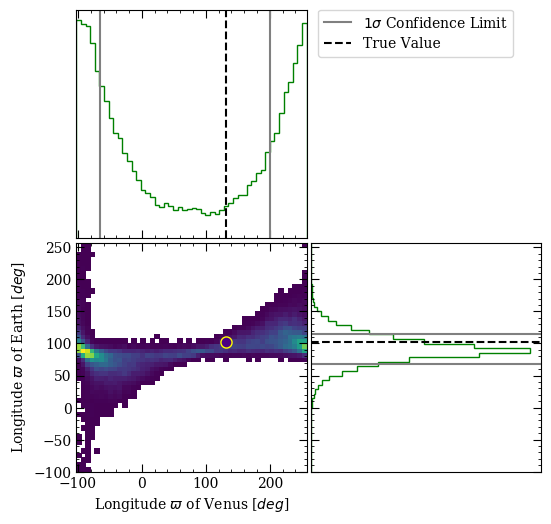

PyObject Text(28.000000000000014, 0.5, 'Longitude $\\varpi$ of Earth [$deg$]')

In [302]:
xvalue = calc_deg.(atan.(vec(par_mcmc[:,iburn:nsteps,5]),vec(par_mcmc[:,iburn:nsteps,4]))) .+ 77.6
yvalue = calc_deg.(atan.(vec(par_mcmc[:,iburn:nsteps,10]),vec(par_mcmc[:,iburn:nsteps,9]))) .+ 77.8
optx = calc_deg(atan(e1sinw1,e1cosw1)) + 77.6
opty = calc_deg(atan(e2sinw2,e2cosw2)) + 77.8
truex = 131.601125535
truey = 102.78555318000001
meanx=mean(xvalue);sigmax=std(xvalue)
meany=mean(yvalue);sigmay=std(yvalue)
nbins=50
corner_plot(xvalue,yvalue,nbins,optx,opty,truex,truey)
xlabel(L"Longitude $\varpi$ of Venus [$deg$]")
ylabel(L"Longitude $\varpi$ of Earth [$deg$]")

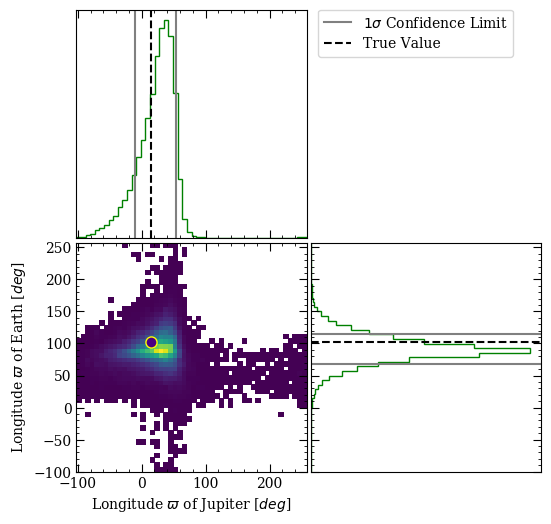

PyObject Text(28.000000000000014, 0.5, 'Longitude $\\varpi$ of Earth [$deg$]')

In [301]:
xvalue = calc_deg.(atan.(vec(par_mcmc[:,iburn:nsteps,15]),vec(par_mcmc[:,iburn:nsteps,14]))) .+ 77.9
yvalue = calc_deg.(atan.(vec(par_mcmc[:,iburn:nsteps,10]),vec(par_mcmc[:,iburn:nsteps,9]))) .+ 77.8
optx = calc_deg(atan(e3sinw3,e3cosw3)) + 77.9
opty = calc_deg(atan(e2sinw2,e2cosw2)) + 77.8
truex = 14.62221649
truey = 102.78555318000001
nbins=50
corner_plot(xvalue,yvalue,nbins,optx,opty,truex,truey)
xlabel(L"Longitude $\varpi$ of Jupiter [$deg$]")
ylabel(L"Longitude $\varpi$ of Earth [$deg$]")

In [177]:
calc_deg(2pi)

360.0

In [258]:
(360/P_3 * (t03 - J2000) - 34.39644051)

-710.8763835752388

In [54]:
include("testplot.jl")

corner_planet (generic function with 2 methods)

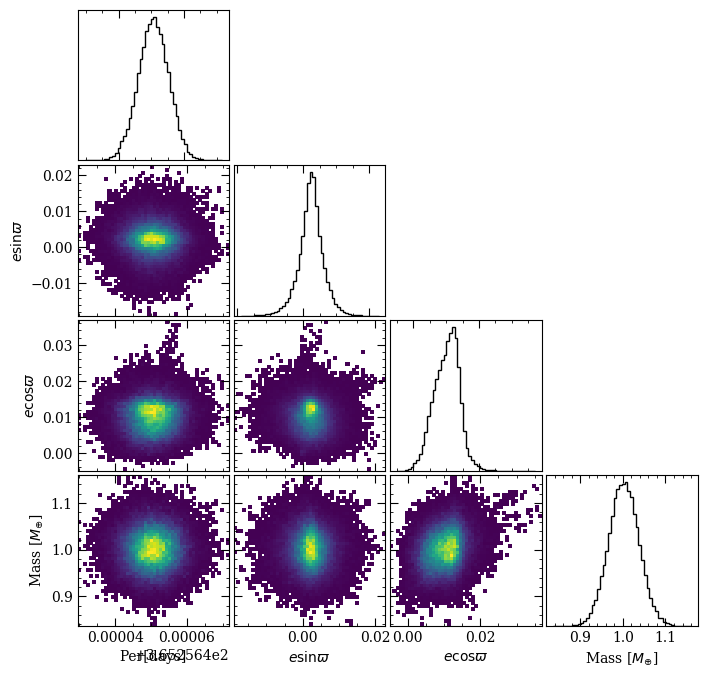

In [566]:
corner_planet(vec(par_mcmc[:,iburn:nsteps,6]).* CGS.MSUN/CGS.MEARTH,
    vec(par_mcmc[:,iburn:nsteps,9]),
    vec(par_mcmc[:,iburn:nsteps,10]),
    vec(par_mcmc[:,iburn:nsteps,7]),
0.815,-0.004,-0.002,224.5)

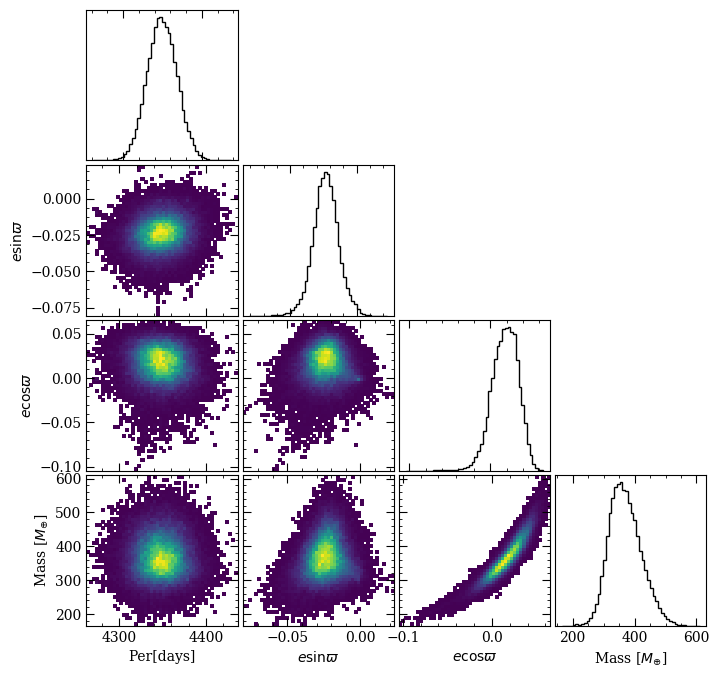

In [568]:
corner_planet(vec(par_mcmc[:,iburn:nsteps,11]).* CGS.MSUN/CGS.MEARTH,
    vec(par_mcmc[:,iburn:nsteps,14]),
    vec(par_mcmc[:,iburn:nsteps,15]),
    vec(par_mcmc[:,iburn:nsteps,12])
318,-0.004,-0.002,224.5)

In [4]:
include("MCMC.jl")
include("sim_times.jl")
include("fit_mysterybody.jl")

fit_planet4 (generic function with 4 methods)

In [7]:
function moon_run(label,sigma)
sim_times(jd1,jd2,jdsize,true,sigma,false)
datafile = string("INPUTS/tt_data",sigma,"snoEMB.txt")
fit_moon(datafile,label,jd1,jd2,jdsize,p3in,p3out,np3,nphase,dpin,dpout,ndp,true,sigma,false)
end

function moon_mcmc(label,nwalkers,nsteps)
fitfile = string("OUTPUTS/moon_fit",label,"params.jld2")
foutput = string("NYR40/moon_",label)
f = jldopen(String(fitfile),"r")
MCMC(f["pbest_global"],f["lprob_best"],foutput,nsteps,nwalkers,f["nplanet"],f["ntrans"],f["tt0"],f["tt"],f["sigtt"],false,true,true)
end


moon_mcmc (generic function with 1 method)

In [30]:
###### NYR40 ########
jd1 = 2.4332825e6
jd2 = 2.4478925e6
jdsize = 1000
p3in = 4230.0
p3out = 4430.0
np3 = 100
nphase = 36
dpin = 0.0 
dpout = 2*pi
ndp = 72
# nwalkers = 50
# nsteps = 1000



72

In [31]:
@time moon_run("try2",30.0)
# @time moon_mcmc("try1",50,3000)

Initial parameters: [3.0e-6, 224.70077139170323, 2.433503768850492e6, 0.08, -0.03, 3.0e-6, 365.25647179330895, 2.433624407337019e6, -0.09, 0.09]
Initial chi-square: 82325.28119917156
Finished 2-planet fit: [3.5685031018636263e-6, 224.7007713926779, 2.433503768866287e6, -0.0511264799696985, -0.06113423029033675, 2.7376564142911842e-6, 365.2564697749263, 2.4336244073287915e6, -0.027369848197452452, -0.046647739766573736]
Period: 4229.999999999999 chi: -304.9522152143406 Param: [3.7867816453465065e-6, 224.70077125841283, 2.433503768824883e6, -0.04430340043137634, -0.08191712753522642, 2.7502643598586917e-6, 365.2564719024667, 2.433624407142211e6, -0.021284129659437115, -0.0629454293083493, 0.00037102477183665467, 4229.999999999999, 2.444086155506678e6, -0.13836952973831934, 0.08865994942143625]
Period: 4231.9743576935625 chi: -304.85839095838105 Param: [3.786828293297386e-6, 224.70077124243838, 2.4335037688255445e6, -0.044290245991989406, -0.08190000796284938, 2.7504032788452082e-6, 365.2

Period: 4271.655606951618 chi: -303.37440427372974 Param: [3.806305070857463e-6, 224.70077094862128, 2.4335037688383935e6, -0.04234757625609617, -0.08156000747335065, 2.761345004282462e-6, 365.2564699098704, 2.433624407189921e6, -0.019673163698801236, -0.0626181894537761, 0.00039590751006359745, 4271.655606951618, 2.439830261169488e6, -0.12496725876086459, 0.08429758688623021]
Period: 4273.649407450871 chi: -303.3210120990609 Param: [3.8061454811943204e-6, 224.70077093354007, 2.4335037688390655e6, -0.042365606908757895, -0.08157155096367438, 2.7612606691229863e-6, 365.25646981523704, 2.433624407192246e6, -0.01968530437833582, -0.0626238451373833, 0.00039688454898788083, 4273.649407450871, 2.44410357613474e6, -0.12445420511857515, 0.08435318270640065]
Period: 4275.644138558953 chi: -303.26973787944763 Param: [3.8046858903947534e-6, 224.7007709182296, 2.4335037688397793e6, -0.04247873853351377, -0.08157955767918862, 2.7608174319207842e-6, 365.2564697211909, 2.433624407194603e6, -0.019772

Period: 4315.7348589794265 chi: -302.7091416095576 Param: [3.818175426153231e-6, 224.70077063895332, 2.4335037688529687e6, -0.041010862204677395, -0.08119476589586049, 2.7695295015802918e-6, 365.25646778735273, 2.4336244072433836e6, -0.01854220881110598, -0.06230370676001461, 0.0004209955908735146, 4315.7348589794265, 2.439810676270081e6, -0.111726963729566, 0.08187330127538599]
Period: 4317.749233523683 chi: -302.7054897295843 Param: [3.818273955361813e-6, 224.70077062570854, 2.4335037688536025e6, -0.04098505588968919, -0.08121486339609647, 2.769814664422357e-6, 365.25646769375135, 2.433624407245795e6, -0.018518773863156784, -0.06231844326601673, 0.00042150346334031343, 4317.749233523683, 2.4441279562782496e6, -0.11150541436234404, 0.08198487370395276]
Period: 4319.764548279731 chi: -302.7042603296584 Param: [3.8192271213819935e-6, 224.7007706121168, 2.4335037688542586e6, -0.0408938559717457, -0.08121187751733716, 2.770228194852182e-6, 365.2564675964644, 2.4336244072482856e6, -0.01844

Period: 4360.268965199171 chi: -303.20271339625265 Param: [3.822410051019851e-6, 224.70077035842945, 2.433503768867147e6, -0.04027686056766839, -0.08092023677397898, 2.7746742445165203e-6, 365.2564657402725, 2.4336244072972555e6, -0.01788814696105631, -0.06207577087264013, 0.00044277350754067413, 4360.268965199171, 2.4441561544823684e6, -0.10048309218065739, 0.08075346678303234]
Period: 4362.304126092185 chi: -303.25431555955237 Param: [3.823829523955361e-6, 224.70077034682745, 2.4335037688677274e6, -0.04013078032261429, -0.08091625243839008, 2.7754849613909547e-6, 365.25646564770335, 2.4336244072996657e6, -0.017768627923916282, -0.06207402337720195, 0.00044339939927063525, 4362.304126092185, 2.4441567556763776e6, -0.10033109897473683, 0.08060094332684671]
Period: 4364.340236899043 chi: -303.3084900897894 Param: [3.824740835601335e-6, 224.70077033593307, 2.433503768868323e6, -0.04002462149147403, -0.08081411217371377, 2.776171124405715e-6, 365.25646555742264, 2.433624407302101e6, -0.01

Period: 4405.262619255287 chi: -304.92713841486983 Param: [3.823464633687962e-6, 224.70077012047122, 2.433503768880056e6, -0.0397234041021865, -0.08056561582135993, 2.7789305163986213e-6, 365.25646386174407, 2.433624407348639e6, -0.017383000778062995, -0.06179944552638155, 0.00045992140003305336, 4405.262619255287, 2.444187161725047e6, -0.09171633690438631, 0.08001342460651695]
Period: 4407.3187809915735 chi: -305.0343437492 Param: [3.823840910119108e-6, 224.7007701111768, 2.4335037688806127e6, -0.03966823146661069, -0.0804760308646485, 2.779290130546644e-6, 365.2564637812043, 2.4336244073508936e6, -0.017335624221451018, -0.06173025069094878, 0.00046144749243113117, 4407.3187809915735, 2.4441881151284166e6, -0.09101561214520158, 0.079737429792521]
Period: 4409.375902443875 chi: -305.1439660752535 Param: [3.822988747256902e-6, 224.70077010158846, 2.4335037688811542e6, -0.039717038665219244, -0.08046406493549652, 2.779174711027228e-6, 365.25646370331884, 2.433624407353098e6, -0.017371989

deltaphi: 0.5309734062405285 chi: -306.67658494579604 Param: [4.741602432862091e-6, 224.70077006222164, 2.4335037688858774e6, 0.017044108340204145, -0.060102910522976644, 3.078418675879058e-6, 365.25646610710066, 2.433624407289343e6, 0.026741234629549256, -0.04538553930665658, 0.0007872504234341803, 4377.97449258298, 2.4460159622077127e6, 0.1891762636523486, -0.06051624168730382, 0.000421485357011943, 0.001165810039102669, 0.5309734062405285]
deltaphi: 0.6194689739472832 chi: -304.21399496382173 Param: [3.7036233510045156e-6, 224.70077042922733, 2.4335037688731197e6, -0.05432757722395027, -0.08463499878577707, 2.70218255108592e-6, 365.2564667559744, 2.433624407276425e6, -0.029100366619477555, -0.06504128294187099, 0.00039914645592507126, 4348.701079133135, 2.4442800945261987e6, -0.06599203109984146, 0.11808614391574614, -0.00021724260226988685, 0.0003676538198092786, 0.6194689739472832]
deltaphi: 0.7079645416540379 chi: -315.4240565276051 Param: [4.792596271956195e-6, 224.700771406751,

deltaphi: 2.2123891926688684 chi: -371.2080339181682 Param: [2.5517016716783e-6, 224.7007714109388, 2.433503768827641e6, 0.0034204769163160005, -0.00018779539428427202, 3.0366033963914426e-6, 365.25646572866196, 2.433624407298333e6, 0.015225150271293258, 0.0024452428001229412, 0.000977146592175156, 4304.836997673989, 2.443422552401139e6, 0.030367166243898274, -0.03511172295627901, 6.316253844230897e-5, -0.001611338456498772, 2.2123891926688684]
deltaphi: 2.3008847603756233 chi: -271.2603064169562 Param: [2.552305111162431e-6, 224.70077141008844, 2.433503768827671e6, 0.0034660631263109965, -0.0002115513516388425, 3.03687002958065e-6, 365.25646572562886, 2.433624407298408e6, 0.01526127479370989, 0.0024261935833473722, 0.0009766255482828942, 4304.894973214799, 2.4434226506788554e6, 0.030334884195849156, -0.035138733540795324, 6.286299269082555e-5, -0.0016111773934852213, 2.3008847603756233]
deltaphi: 2.3893803280823778 chi: -368.2712240886849 Param: [2.551100760342586e-6, 224.700771410002

deltaphi: 3.8938049790972085 chi: -368.2680648428373 Param: [2.5516582788509586e-6, 224.7007714106505, 2.4335037688276456e6, 0.003421782232877643, -0.0002028711535437958, 3.036598949104224e-6, 365.25646573135924, 2.4336244072982506e6, 0.015225806717524689, 0.002433167638160914, 0.0009770553181537623, 4304.784485832775, 2.443422578145821e6, 0.030364051623165585, -0.035118502306633936, 6.317754842955383e-5, 0.001611311882571823, 3.8938049790972085]
deltaphi: 3.982300546803963 chi: -271.26734580954223 Param: [2.5516499222889084e-6, 224.700771409704, 2.4335037688276847e6, 0.0034381774367481265, -0.00023293952193888663, 3.0367288320660716e-6, 365.25646572627426, 2.4336244072983754e6, 0.015239490226836842, 0.0024082198775909496, 0.0009768323426697935, 4304.8423813461395, 2.443422908118442e6, 0.030319561279961577, -0.03509764074068359, 6.282156915459613e-5, 0.0016112747552533176, 3.982300546803963]
deltaphi: 4.070796114510718 chi: -371.2020970738993 Param: [2.55189209721158e-6, 224.7007714100

deltaphi: 5.575220765525549 chi: -310.12229616401163 Param: [3.7015283407336503e-6, 224.70077042849445, 2.4335037688730266e6, -0.05454668077287766, -0.08475053350542958, 2.7009044850391637e-6, 365.25646675129383, 2.4336244072765224e6, -0.029278459315527815, -0.06512553058366846, 0.00039777103728888254, 4348.4910101082105, 2.4442816352387676e6, -0.06687022248930198, 0.11895335935285159, -0.00022018852364313077, -0.0003642913687076821, 5.575220765525549]
deltaphi: 5.663716333232303 chi: -304.23786373993363 Param: [3.698899395620403e-6, 224.70077042784797, 2.433503768873195e6, -0.05481447019822098, -0.08470081271587838, 2.699653116268634e-6, 365.25646676381837, 2.4336244072762355e6, -0.0294895845494088, -0.06508477683854014, 0.0003983858517773247, 4348.647190291739, 2.444283110128698e6, -0.06584625149208413, 0.11893619194671629, -0.00021757185128945162, -0.0003684738496288062, 5.663716333232303]
deltaphi: 5.7522119009390575 chi: -311.2590127298798 Param: [3.6450044422711446e-6, 224.700770

(-263.8915540730089, [2.551224594316028e-6, 224.7007714102686, 2.4335037688276754e6, 0.003420681697110603, -0.0002182122565361728, 3.036634787270893e-6, 365.2564657278818, 2.4336244072983414e6, 0.015226075676882358, 0.0024219051230228925, 0.000977596784072095, 4304.838315211312, 2.4434227857896723e6, 0.030420376403921114, -0.035077907806294516, 6.300340624228565e-5, -0.0016114256872145198, 2.311017557459077])

In [8]:
@time moon_mcmc("try2",50,0000)

Step: 241 Walker: 2 Trial Log Prob: 720.3015980648034 Prob: 0.65126234569212 Frac: 0.2082986168971838
Step: 605 Walker: 39 Trial Log Prob: 619.1013163327847 Prob: 1.3396274857854423e-59 Frac: 0.16148020767882537
Step: 657 Walker: 40 Trial Log Prob: 717.5811234793686 Prob: 2.9212747066908667e-7 Frac: 0.15688185140073083
Number of steps: 1000 Acceptance Rate: 0.13988
Step: 1246 Walker: 12 Trial Log Prob: 685.6466478564345 Prob: 1.710174106438196e-24 Frac: 0.098597292448214
Step: 1277 Walker: 16 Trial Log Prob: 668.4569430500754 Prob: 1.613967656891361e-28 Frac: 0.09619281991893457
Step: 1496 Walker: 43 Trial Log Prob: -4691.154576550128 Prob: 0.0 Frac: 0.09881821481869883
Step: 1619 Walker: 31 Trial Log Prob: 272.61914639858514 Prob: 2.552692757083958e-205 Frac: 0.09902686625068702
Step: 1834 Walker: 32 Trial Log Prob: 742.1509234067661 Prob: 0.05773087336149287 Frac: 0.10191449546566864
Number of steps: 2000 Acceptance Rate: 0.1024
Step: 2179 Walker: 20 Trial Log Prob: 672.8061575470426

([549.6651488119494 549.6651488119494 … 750.2184238856894 750.2184238856894; 535.8023139160754 535.8023139160754 … 745.8605271227686 745.8605271227686; … ; 566.2620848372173 570.4767341214343 … 751.3763950378357 751.3763950378357; 567.1639936299063 567.1639936299063 … 748.5802912102596 748.5802912102596], [2.503928382109082e-6 2.503928382109082e-6 … 2.276301878914142e-6 2.276301878914142e-6; 2.489865132197589e-6 2.489865132197589e-6 … 2.3062026631300107e-6 2.3062026631300107e-6; … ; 2.497274781123079e-6 2.506648348498192e-6 … 2.1149644740377037e-6 2.1149644740377037e-6; 2.509449149184976e-6 2.509449149184976e-6 … 2.3133983749088693e-6 2.3133983749088693e-6]

[224.70076391265752 224.70076391265752 … 224.70077172761788 224.70077172761788; 224.7007754062893 224.7007754062893 … 224.7007686224938 224.7007686224938; … ; 224.70076599851114 224.70076695536488 … 224.7007673373189 224.7007673373189; 224.7007781891129 224.7007781891129 … 224.7007691687031 224.7007691687031]

[2.433503768838536e6 